## 1. Import Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('dataset/9. Wine Quality.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


### 2. Deskripsi Data

In [4]:
numbers = df.select_dtypes(include = ["number"]).columns.tolist()

In [5]:
#Mendeskripsikan Data
round(df.describe(),2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00
mean,8.32,0.53,0.27,2.54,0.09,15.87,46.47,1.00,3.31,0.66,10.42,5.64
std,1.74,0.18,0.19,1.41,0.05,10.46,32.90,0.00,0.15,0.17,1.07,0.81
min,4.60,0.12,0.00,0.90,0.01,1.00,6.00,0.99,2.74,0.33,8.40,3.00
25%,7.10,0.39,0.09,1.90,0.07,7.00,22.00,1.00,3.21,0.55,9.50,5.00
50%,7.90,0.52,0.26,2.20,0.08,14.00,38.00,1.00,3.31,0.62,10.20,6.00
75%,9.20,0.64,0.42,2.60,0.09,21.00,62.00,1.00,3.40,0.73,11.10,6.00
max,15.90,1.58,1.00,15.50,0.61,72.00,289.00,1.00,4.01,2.00,14.90,8.00


### 3. Cek Duplikasi & Missing Value

In [6]:
#Melihat Jumlah duplikasi baris setiap kolom
df.duplicated().sum()

np.int64(240)

In [7]:
# Hapus semua baris duplikat
df = df.drop_duplicates()

In [8]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### 4. Pemilihan Fitur

### 5. EDA

In [9]:
df["quality"].value_counts()

quality
5    577
6    535
7    167
4     53
8     17
3     10
Name: count, dtype: int64

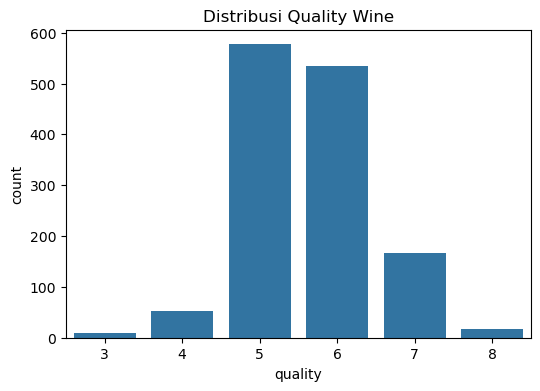

In [10]:
#Distribusi Target

plt.figure(figsize=(6,4))
sns.countplot(x="quality", data=df)
plt.title("Distribusi Quality Wine")
plt.show()

- Kualitas Dominan: Mayoritas wine berada pada kualitas 5 dan 6.
- Kualitas Ekstrem Terbatas: Wine dengan kualitas sangat rendah atau sangat tinggi jumlahnya relatif sedikit.

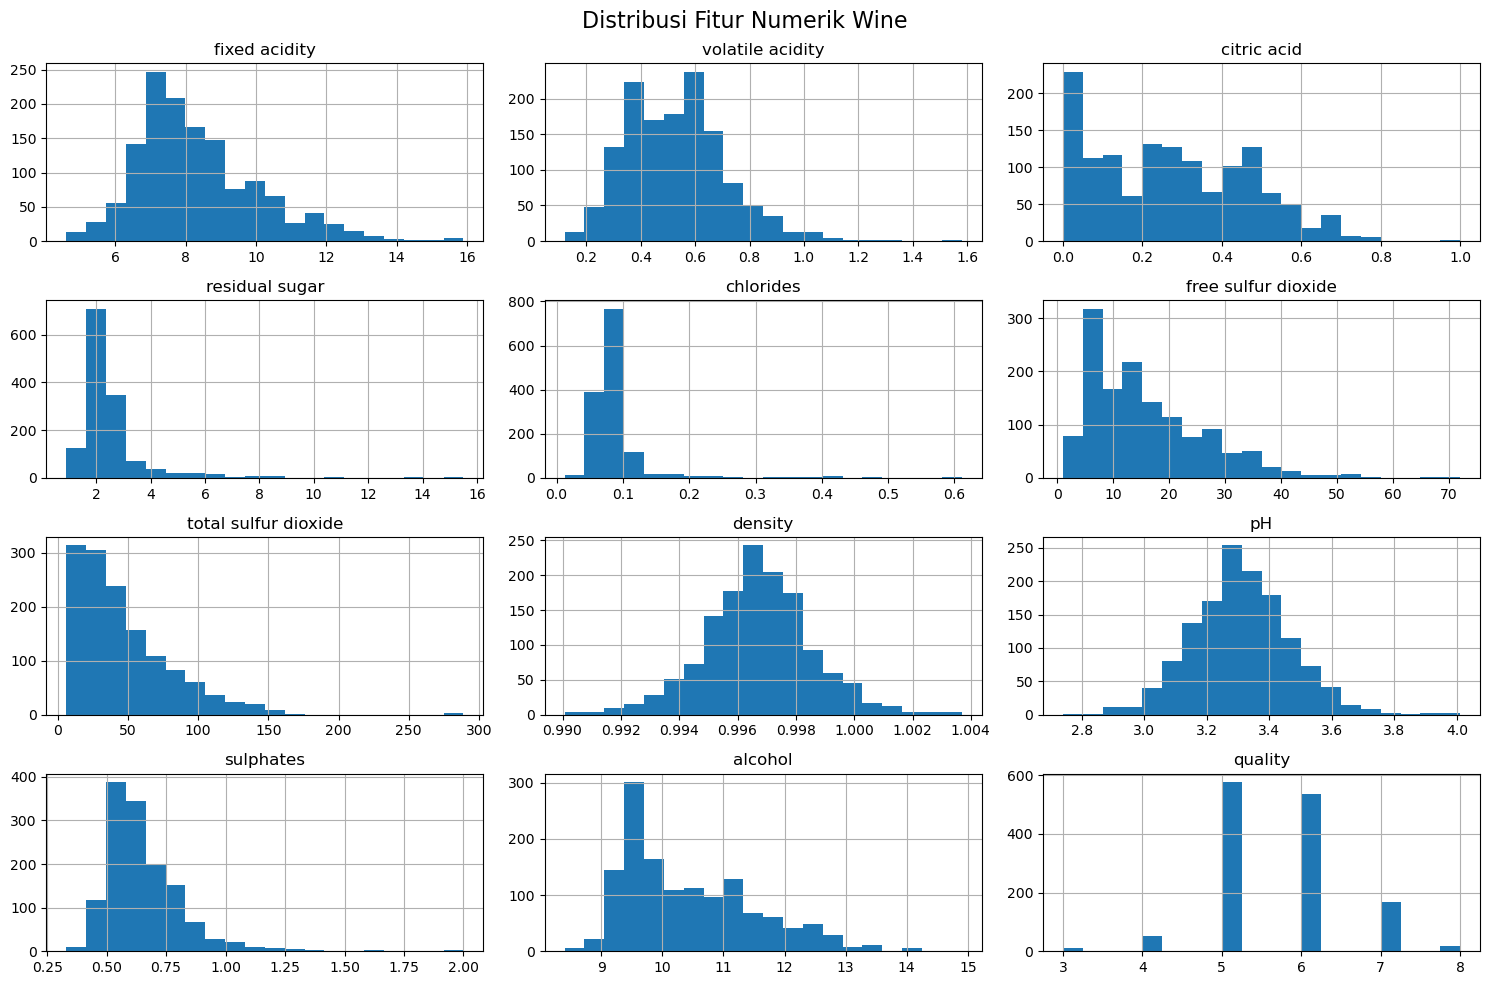

In [11]:
#Distribusi Feature Numerik
df[numbers].hist(bins=20, figsize=(15,10))
plt.suptitle("Distribusi Fitur Numerik Wine", fontsize=16)
plt.tight_layout()
plt.show()

Sebagian besar fitur numerik menunjukkan distribusi yang tidak normal dan cenderung skewed.
Terdapat perbedaan skala yang cukup signifikan antar fitur.
Oleh karena itu, diperlukan normalisasi data sebelum tahap modeling.

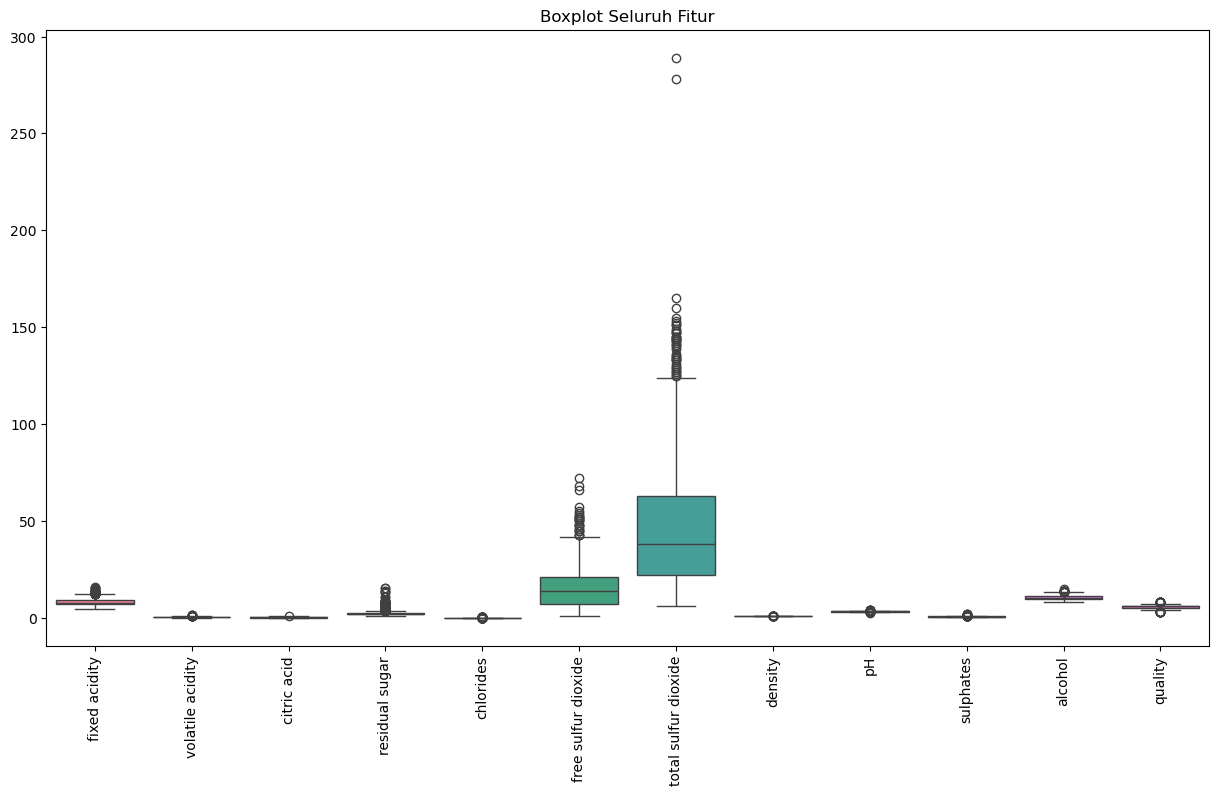

In [12]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title("Boxplot Seluruh Fitur")
plt.show()

Boxplot menunjukkan adanya outlier pada beberapa fitur kimia. Nilai ekstrem ini berpotensi memengaruhi kestabilan model regresi sehingga perlu ditangani pada tahap preprocessing.

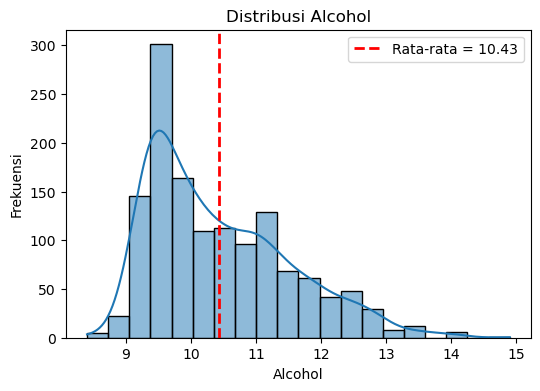

In [13]:
# Distribusi Alkohol

# Hitung rata-rata
mean_alcohol = df["alcohol"].mean()

plt.figure(figsize=(6,4))
sns.histplot(df["alcohol"], bins=20, kde=True)

# Garis rata-rata
plt.axvline(mean_alcohol, color='red', linestyle='--', linewidth=2,
            label=f"Rata-rata = {mean_alcohol:.2f}")

plt.title("Distribusi Alcohol")
plt.xlabel("Alcohol")
plt.ylabel("Frekuensi")
plt.legend()
plt.show()


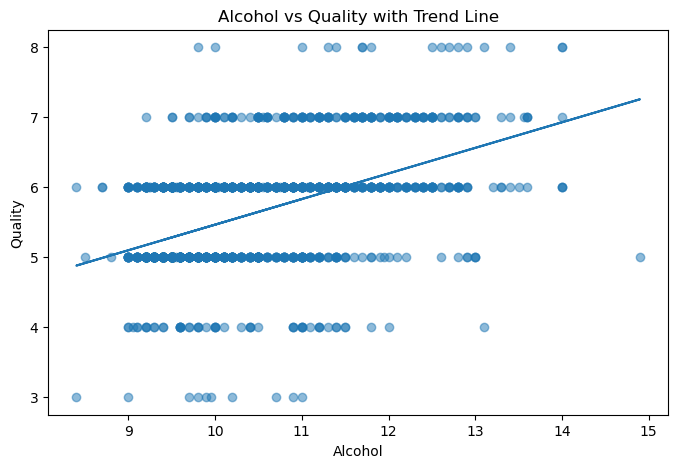

In [14]:
import numpy as np

z = np.polyfit(df['alcohol'], df['quality'], 1)
p = np.poly1d(z)

plt.figure(figsize=(8,5))
plt.scatter(df['alcohol'], df['quality'], alpha=0.5)
plt.plot(df['alcohol'], p(df['alcohol']))
plt.xlabel('Alcohol')
plt.ylabel('Quality')
plt.title('Alcohol vs Quality with Trend Line')
plt.show()

Distribusi alcohol cenderung right-skewed, di mana sebagian besar wine memiliki kadar alkohol pada rentang 9–11%.
Nilai rata-rata alcohol berada di sekitar 10.37%, sedikit bergeser ke kanan dari puncak distribusi, menandakan adanya beberapa wine dengan kadar alkohol tinggi.
Wine dengan kadar alkohol yang lebih tinggi cenderung memiliki kualitas yang lebih baik, sehingga alcohol berpotensi memberikan pengaruh positif terhadap quality.

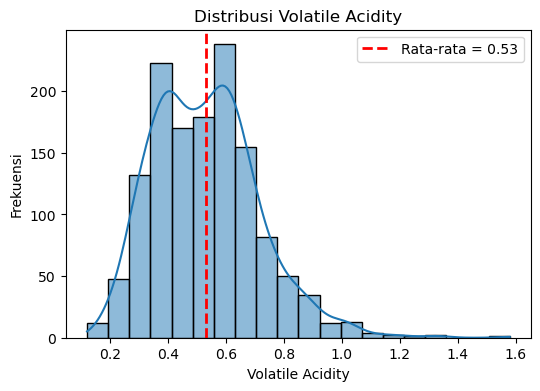

In [15]:
# Distribusi Volile Acidity

# Hitung rata-rata
mean_va = df["volatile acidity"].mean()

plt.figure(figsize=(6,4))
sns.histplot(df["volatile acidity"], bins=20, kde=True)

# Garis rata-rata
plt.axvline(mean_va, color='red', linestyle='--', linewidth=2,
            label=f"Rata-rata = {mean_va:.2f}")

plt.title("Distribusi Volatile Acidity")
plt.xlabel("Volatile Acidity")
plt.ylabel("Frekuensi")
plt.legend()
plt.show()


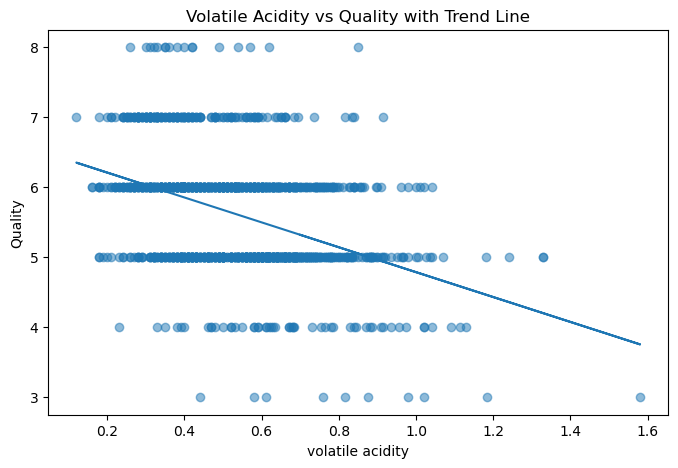

In [16]:
import numpy as np

z = np.polyfit(df['volatile acidity'], df['quality'], 1)
p = np.poly1d(z)

plt.figure(figsize=(8,5))
plt.scatter(df['volatile acidity'], df['quality'], alpha=0.5)
plt.plot(df['volatile acidity'], p(df['volatile acidity']))
plt.xlabel('volatile acidity')
plt.ylabel('Quality')
plt.title('Volatile Acidity vs Quality with Trend Line')
plt.show()


Distribusi volatile acidity memiliki satu puncak utama, menunjukkan sebagian besar data terkonsentrasi pada rentang nilai tertentu.
Nilai rata-rata volatile acidity berada di sekitar 0.52 dan terletak di tengah distribusi, menandakan data relatif stabil dan tidak didominasi oleh nilai ekstrem.
Nilai volatile acidity yang tinggi relatif jarang dan berpotensi berdampak negatif terhadap kualitas wine, sehingga fitur ini relevan untuk digunakan dalam proses modeling.

<Axes: >

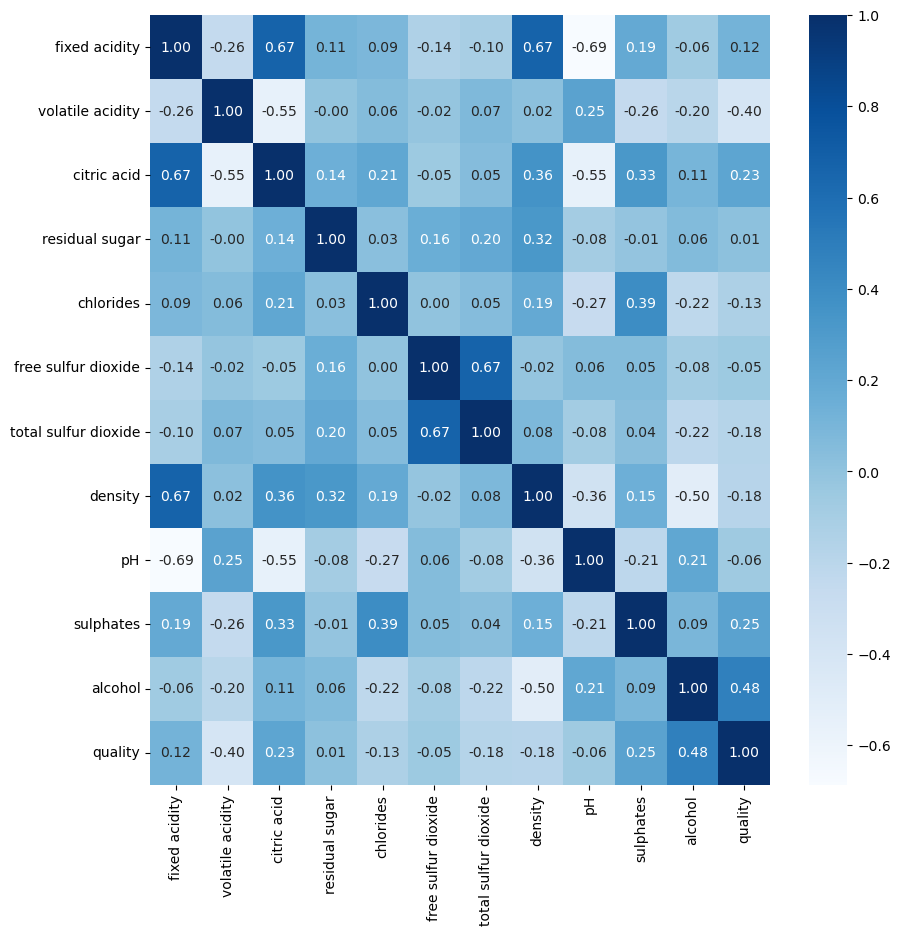

In [17]:
# Correlation Heatmap untuk melihat korelasi linear antara kolom-kolom numerik
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f', annot_kws={"size": 10})

- Alcohol memiliki korelasi positif paling kuat terhadap quality (≈ 0.48), menunjukkan bahwa wine dengan kadar alkohol lebih tinggi cenderung memiliki kualitas yang lebih baik.
- Volatile acidity memiliki korelasi negatif terhadap quality (≈ -0.40), yang mengindikasikan bahwa peningkatan volatile acidity cenderung menurunkan kualitas wine.
- Beberapa fitur menunjukkan korelasi tinggi antar sesama fitur, seperti: fixed acidity dengan citric acid dan density, free sulfur dioxide dengan total sulfur dioxide  mengindikasikan potensi multikolinearitas, sehingga diperlukan pendekatan regularisasi pada tahap modeling.
- Fitur lain memiliki korelasi yang relatif lemah terhadap quality, sehingga kontribusinya terhadap target cenderung lebih kecil dibandingkan alcohol dan volatile acidity.

### 6. Deteksi Outlier

In [18]:
#Hitung Q1, Q3 dan IQR untuk kolom numerik
Q1 = df[numbers].quantile(0.25)
Q3 = df[numbers].quantile(0.75)
IQR = Q3 - Q1


#Tentukan batas bawah dan atas
lower_bound = Q1 - 1.5 *IQR
upper_bound = Q3 + 1.5 * IQR

#Filter baris oulier
df_outliers = df[((df[numbers] < lower_bound)| (df[numbers] > upper_bound)).any(axis=1)]
print("Data Outlier :", df_outliers.shape[0], "baris") 

Data Outlier : 354 baris


In [19]:
#6. Outlier
#Ambil baris yang tidak memiliki outliers
df_no_outliers = df[~((df[numbers] < lower_bound)| (df[numbers] > upper_bound)).any(axis=1)]
print("Data sebelum : ", df.shape[0], "baris") 
print("Data sesudah : ", df_no_outliers.shape[0], "baris") 

Data sebelum :  1359 baris
Data sesudah :  1005 baris


In [20]:
df = df_no_outliers.copy()

### 7. Membagi variabel X dan y

In [21]:
#Memisahkan variabel bebas (x) dan terikat (y)
X = df.drop("quality", axis=1)
y = df["quality"]

### 8. Cek Kolinearitas 

In [22]:
#Mengecek nilai VIF setiap kolom
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                   for i in range(X.shape[1])]

vif_data

,feature,VIF
0,fixed acidity,104.352360
1,volatile acidity,20.992539
2,citric acid,8.669747
3,residual sugar,30.894684
4,chlorides,35.777397
5,free sulfur dioxide,7.073771
6,total sulfur dioxide,7.403792
7,density,1938.766192
8,pH,1390.909106
9,sulphates,38.817311


In [23]:
#Menghapus kolom yang memiliki nilai VIF yang sangat besar
X = X.drop(columns = ['density', 'pH'])

Setelah dilakukan analisis multikolinearitas menggunakan Variance Inflation Factor (VIF), fitur density dan pH dihapus karena memiliki nilai VIF yang sangat tinggi.

In [24]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.58,9.8
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.56,9.4


### 9. Data Train & Data Test

In [25]:
#Membagi data latih dan uji (80% data latih, 20% data uji)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Hasil Split
print('Jumlah data train:', len(X_train))
print('Jumlah data test :', len(X_test))

Jumlah data train: 804
Jumlah data test : 201


In [26]:
X_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates,alcohol
117,7.8,0.560,0.12,2.0,0.082,7.0,28.0,0.50,9.4
47,8.7,0.290,0.52,1.6,0.113,12.0,37.0,0.58,9.5
443,10.0,0.440,0.49,2.7,0.077,11.0,19.0,0.63,11.6
835,7.6,0.665,0.10,1.5,0.066,27.0,55.0,0.51,9.3
1048,9.3,0.490,0.36,1.7,0.081,3.0,14.0,0.78,10.9


In [27]:
X_test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates,alcohol
1492,6.2,0.650,0.06,1.6,0.050,6.0,18.0,0.54,11.95
1019,7.0,0.500,0.14,1.8,0.078,10.0,23.0,0.61,10.40
1101,7.4,0.490,0.27,2.1,0.071,14.0,25.0,0.63,12.00
844,9.9,0.250,0.46,1.7,0.062,26.0,42.0,0.83,10.60
602,7.7,0.835,0.00,2.6,0.081,6.0,14.0,0.52,9.30


### 10. Normalisasi

In [28]:
#Normalisasi Data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Data fitur dinormalisasi menggunakan StandardScaler. Proses fitting dilakukan pada data latih dan diterapkan pada data uji untuk mencegah data leakage.

In [29]:
X_train_scaled

array([[-0.2329886 ,  0.23893817, -0.68907423, ..., -0.55706302,
        -1.133781  , -0.98535267],
       [ 0.38546536, -1.39189656,  1.53254254, ..., -0.21251152,
        -0.42294375, -0.88172631],
       [ 1.27878774, -0.48587726,  1.36592128, ..., -0.90161452,
         0.02132954,  1.29442732],
       ...,
       [-0.98887677, -0.24427212, -1.24447842, ...,  2.6204675 ,
        -0.86721703, -0.67447358],
       [ 0.52289957, -0.24427212, -0.0225892 , ...,  2.42904999,
        -0.86721703, -1.1926054 ],
       [-0.2329886 ,  0.05773431, -1.13339759, ..., -0.44221252,
        -0.60065306, -0.36359449]])

In [30]:
X_test_scaled

array([[-1.3324623 ,  0.78254975, -1.02231675, ..., -0.93989802,
        -0.77836237,  1.65711959],
       [-0.78272545, -0.12346955, -0.57799339, ..., -0.74848052,
        -0.15637978,  0.05091096],
       [-0.50785702, -0.18387083,  0.14403206, ..., -0.67191352,
         0.02132954,  1.70893277],
       ...,
       [ 0.66033379, -0.3046734 ,  1.36592128, ...,  2.42904999,
        -0.33408909, -1.29623176],
       [ 1.41622196, -0.96908756,  2.19902757, ..., -0.05937752,
         0.28789351,  2.22706459],
       [ 0.45418247, -0.48587726,  1.36592128, ...,  2.6204675 ,
        -0.24523443, -0.88172631]])

### 11. Modeling dengan Regresi Linear

In [31]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [32]:
# Melihat koefisien masing-masing fitur
coef_df = pd.DataFrame({
    'feature': X.columns,
    'coefficient': model.coef_
})

# Melihat nilai intercept
print("Intercept Linear:", round((model.intercept_), 4))

coef_df

Intercept Linear: 2.0942


,feature,coefficient
0,fixed acidity,0.035363
1,volatile acidity,-0.816801
2,citric acid,-0.342547
3,residual sugar,-0.039686
4,chlorides,-1.826728
5,free sulfur dioxide,0.003735
6,total sulfur dioxide,-0.002397
7,sulphates,1.809498
8,alcohol,0.278375


In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Prediksi
y_pred = model.predict(X_test)

# MAE
mae = mean_absolute_error(y_test, y_pred)

# MAPE (gunakan rumus manual karena sklearn tidak menyediakan)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# R2 Score
r2 = r2_score(y_test, y_pred)

print("MAE :", mae)
print("MAPE:", mape, "%")
print("RMSE:", rmse)
print("R2:", r2)

MAE : 0.46071110405639987
MAPE: 8.330786123684573 %
RMSE: 0.5805726375483551
R2: 0.35485378063437756


Model regresi linear digunakan sebagai baseline. Hasil evaluasi menunjukkan MAE sebesar 0.47, MAPE sebesar 8.33%, RMSE sebesar 0.58, dan R² sebesar 0.35. Nilai R² yang relatif rendah menunjukkan bahwa hubungan antara variabel independen dan kualitas wine tidak sepenuhnya linear, sehingga diperlukan model dengan regularisasi.
- MAE : 0.47 menunjukkan Rata-rata prediksi kualitas wine meleset sekitar ±0.47 poin dari nilai sebenarnya.
- MAPE : 8.33 artinya Rata-rata kesalahan prediksi sekitar 8% dari nilai kualitas aktual.
- RMSE : 0.58 menunjukkan masih ada beberapa error yang cukup besar (karena RMSE sensitif terhadap error besar).
- R2 : 0.35 artinya Model hanya mampu menjelaskan sekitar 35% variasi kualitas wine.

### 13. Tuning Hyperparameter

In [34]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
import numpy as np

#Pada Ridge
ridge = Ridge()
alphas = np.logspace(-3, 3, 20)  # λ dari 0.001 sampai 1000
param_grid = {'alpha': alphas}

grid = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid.fit(X_train_scaled, y_train)

print("Best alpha:", grid.best_params_)
print("Best score:", grid.best_score_)

Best alpha: {'alpha': np.float64(26.366508987303554)}
Best score: -0.34104694642764205


Alpha terbaik ≈ 26.37  menunjukkan multikolinearitas cukup kuat, sehingga model butuh regularisasi yang cukup besar.
MSE ≈ 0.34 Ridge berhasil menurunkan error dan membuat model lebih stabil dibanding regresi linear biasa.

In [35]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
import numpy as np

# Pada Lasso
lasso = Lasso()

alphas = np.logspace(-3, 3, 20)  # λ dari 0.001 sampai 1000
param_grid = {'alpha': alphas}

grid = GridSearchCV(lasso, param_grid, cv=5,scoring='neg_mean_squared_error')

grid.fit(X_train_scaled, y_train)

print("Best alpha:", grid.best_params_)
print("Best score:", grid.best_score_)

Best alpha: {'alpha': np.float64(0.001)}
Best score: -0.34143688633602604


Best alpha = 0.001 menunjukkan regularisasi sangat lemah, Lasso hampir mirip Linear Regression.
Best score (−MSE) ≈ 0.341 artinya performa validasi mirip Ridge, tidak ada peningkatan signifikan.

### 12. Modeling dengan Ridge & Lasso

#### Ridge

In [36]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=26.37)
ridge.fit(X_train_scaled, y_train)

Ridge(alpha=26.37)

In [37]:
# Melihat koefisien masing-masing fitur
coef_df_ridge = pd.DataFrame({
    'feature': X.columns,
    'coefficient': ridge.coef_
})
# Melihat nilai intercept
print("Intercept Ridge:", round((ridge.intercept_), 4))

coef_df_ridge

Intercept Ridge: 5.6144


,feature,coefficient
0,fixed acidity,0.043098
1,volatile acidity,-0.126921
2,citric acid,-0.046867
3,residual sugar,-0.015630
4,chlorides,-0.029380
5,free sulfur dioxide,0.032756
6,total sulfur dioxide,-0.064983
7,sulphates,0.198929
8,alcohol,0.259099


In [38]:
# Prediksi
y_pred_ridge = ridge.predict(X_test_scaled)

# MAE
mae_ridge = mean_absolute_error(y_test, y_pred)

# MAPE (gunakan rumus manual karena sklearn tidak menyediakan)
mape_ridge = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# RMSE
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred))

# R2 Score
r2_ridge = ridge.score(X_test_scaled, y_test)

print("MAE :", mae_ridge)
print("MAPE:", mape_ridge, "%")
print("RMSE:", rmse_ridge)
print("R2:", r2_ridge)

MAE : 0.46071110405639987
MAPE: 8.330786123684573 %
RMSE: 0.5805726375483551
R2: 0.35797171133988936


#### Lasso

In [39]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.001)
lasso.fit(X_train_scaled, y_train)

Lasso(alpha=0.001)

In [40]:
# Melihat koefisien masing-masing fitur
coef_df_lasso = pd.DataFrame({
    'feature': X.columns,
    'coefficient': lasso.coef_
})
# Melihat nilai intercept
print("Intercept Lasso:", round((lasso.intercept_), 4))

coef_df_lasso

Intercept Lasso: 5.6144


,feature,coefficient
0,fixed acidity,0.047038
1,volatile acidity,-0.132436
2,citric acid,-0.056067
3,residual sugar,-0.016897
4,chlorides,-0.026519
5,free sulfur dioxide,0.030869
6,total sulfur dioxide,-0.061598
7,sulphates,0.203240
8,alcohol,0.267559


In [41]:
# Prediksi
y_pred_lasso = lasso.predict(X_test_scaled)

# MAE
mae_lasso = mean_absolute_error(y_test, y_pred)

# MAPE (gunakan rumus manual karena sklearn tidak menyediakan)
mape_lasso = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# RMSE
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred))

# R2 Score
r2_lasso = lasso.score(X_test_scaled, y_test)

print("MAE :", mae_lasso)
print("MAPE:", mape_lasso, "%")
print("RMSE:", rmse_lasso)
print("R2:", r2_lasso)

MAE : 0.46071110405639987
MAPE: 8.330786123684573 %
RMSE: 0.5805726375483551
R2: 0.35560324459848647


### 14. Evaluasi

In [42]:
#Prediksi dengan model terbaik
y_pred = model.predict(X_test)
y_pred_ridge = ridge.predict(X_test_scaled)
y_pred_lasso = lasso.predict(X_test_scaled)

#Evaluasi Linear Regression
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

#Evaluasi Ridge
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mape_ridge = np.mean(np.abs((y_test - y_pred_ridge) / y_test)) * 100
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
r2_ridge = ridge.score(X_test_scaled, y_test)

#Evaluasi Lasso
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mape_lasso = np.mean(np.abs((y_test - y_pred_lasso) / y_test)) * 100
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
r2_lasso = lasso.score(X_test_scaled, y_test)

#Hasil
eval_df = pd.DataFrame({
    "Model": ["Linear Regression", "Ridge", "Lasso"],
    'Best Alpha' : ['Tidak perlu', '26.37', '0.001'],
    "MAE": [mae, mae_ridge, mae_lasso],
    "MAPE (%)": [mape, mape_ridge, mape_lasso],
    "RMSE": [rmse, rmse_ridge, rmse_lasso],
    "R2" : [r2, r2_ridge, r2_lasso]
})

eval_df

,Model,Best Alpha,MAE,MAPE (%),RMSE,R2
0,Linear Regression,Tidak perlu,0.460711,8.330786,0.580573,0.354854
1,Ridge,26.37,0.460967,8.337766,0.579168,0.357972
2,Lasso,0.001,0.460825,8.333850,0.580235,0.355603


Linear Regression menghasilkan MAE 0.4607 dan R² 0.3549, artinya rata-rata kesalahan prediksi sekitar 0.46 dan model hanya mampu menjelaskan 35.5% variasi kualitas wine. Sebagai baseline, performanya cukup baik tetapi masih kurang stabil terhadap pola kompleks data.

Ridge Regression memberikan hasil terbaik dengan RMSE 0.5792 (terendah) dan R² 0.3580 (tertinggi). Dengan alpha 26.37, Ridge lebih stabil dalam menangani multikolinearitas, sehingga prediksinya sedikit lebih konsisten dibanding model lain.

Lasso Regression memiliki MAE 0.4608 dan R² 0.3556, performanya hampir sama dengan Linear Regression. Alpha optimal 0.001 menunjukkan efek regularisasi sangat kecil, sehingga peningkatan performa tidak signifikan.

In [43]:
df.shape

(1005, 12)